In [1]:
#needed importations
import PIL
import PIL.Image
import tensorflow as tf
import os
import pathlib
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import callbacks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
len(os.listdir('/content/drive/MyDrive/Money-dataset/'))

4

In [4]:
data_dir=pathlib.Path('/content/drive/MyDrive/Money-dataset/')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

886


In [6]:
dt_5 = list(data_dir.glob('5/*'))
dt_10 = list(data_dir.glob('10/*'))
dt_20 = list(data_dir.glob('20/*'))
dt_50 = list(data_dir.glob('50/*'))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
print(len(dt_5) ,len(dt_10), len(dt_20), len(dt_50))

227 288 197 186


In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 898 files belonging to 4 classes.
Using 719 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 898 files belonging to 4 classes.
Using 179 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['10', '20', '5', '50']


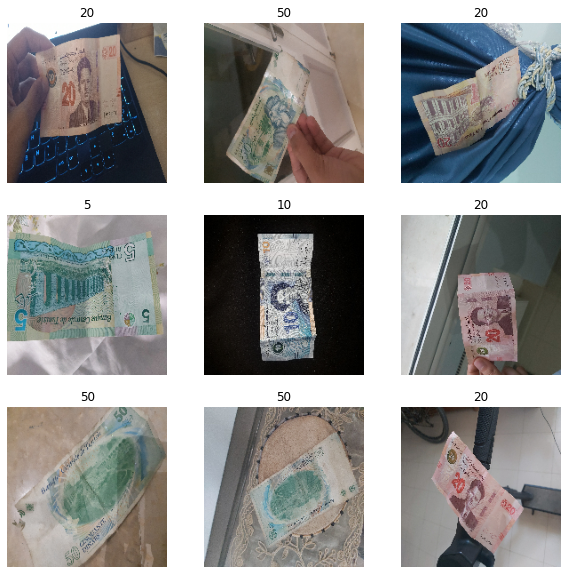

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0038127892 1.0


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
num_classes = len(class_names)

"""
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])"""

"\nmodel = Sequential([\n  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),\n  layers.Conv2D(16, 3, padding='same', activation='relu'),\n  layers.MaxPooling2D(),\n  layers.Conv2D(32, 3, padding='same', activation='relu'),\n  layers.MaxPooling2D(),\n  layers.Conv2D(64, 3, padding='same', activation='relu'),\n  layers.MaxPooling2D(),\n  layers.Flatten(),\n  layers.Dense(128, activation='relu'),\n  layers.Dense(num_classes)\n])"

In [ ]:
"""
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])"""

"\nmodel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])"

In [ ]:
"""
model.summary()"""

'\nmodel.summary()'

In [ ]:
"""
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)"""

'\nepochs=10\nhistory = model.fit(train_ds,validation_data=val_ds,epochs=epochs)'

In [ ]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()"

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),layers.RandomRotation(0.1),layers.RandomZoom(0.1),
  ]
)

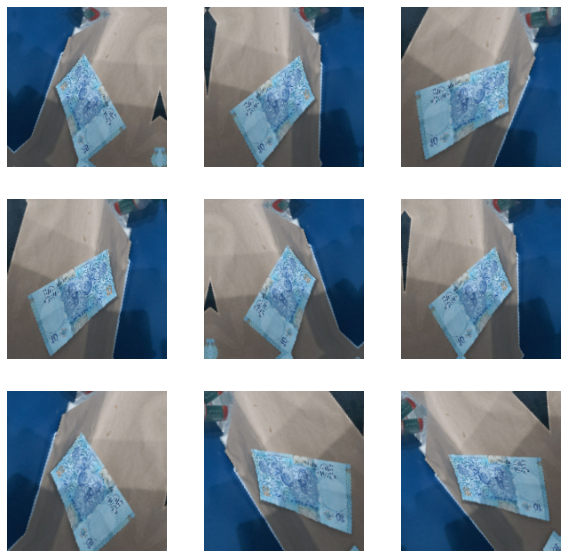

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [20]:
model_after_data_augmentation = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model_after_data_augmentation.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [22]:
model_after_data_augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [42]:
epochs = 100
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
										mode ="min", patience = 7,
										restore_best_weights = True)
history = model_after_data_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks =[earlystopping]
)

Epoch 1/100
23/23 [==============================] - 26s 1s/step - loss: 0.2420 - accuracy: 0.8999 - val_loss: 0.3598 - val_accuracy: 0.8380
Epoch 2/100
23/23 [==============================] - 27s 1s/step - loss: 0.2819 - accuracy: 0.8818 - val_loss: 0.4705 - val_accuracy: 0.8268
Epoch 3/100
23/23 [==============================] - 26s 1s/step - loss: 0.2325 - accuracy: 0.9207 - val_loss: 0.3554 - val_accuracy: 0.8547
Epoch 4/100
23/23 [==============================] - 28s 1s/step - loss: 0.2139 - accuracy: 0.9152 - val_loss: 0.3723 - val_accuracy: 0.8603
Epoch 5/100
23/23 [==============================] - 26s 1s/step - loss: 0.2800 - accuracy: 0.8873 - val_loss: 0.3631 - val_accuracy: 0.8771
Epoch 6/100
23/23 [==============================] - 26s 1s/step - loss: 0.2454 - accuracy: 0.9013 - val_loss: 0.5249 - val_accuracy: 0.8156
Epoch 7/100
23/23 [==============================] - 26s 1s/step - loss: 0.2145 - accuracy: 0.9193 - val_loss: 0.6677 - val_accuracy: 0.8045
Epoch 8/100
2

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
if earlystopping.stopped_epoch!=0 :
  epochs=earlystopping.stopped_epoch
print(epochs)

9


In [55]:
model_after_data_augmentation.save('new_money_model.h5')

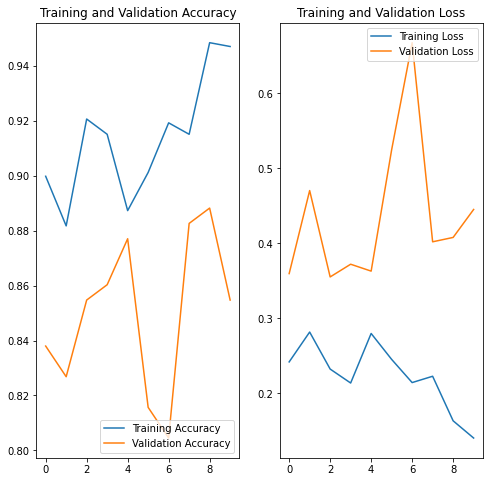

In [44]:


epochs_range = range(epochs+1)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


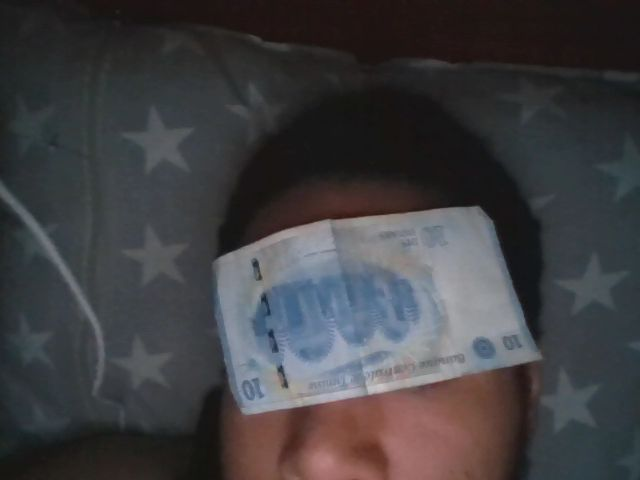

In [64]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [72]:

img = tf.keras.utils.load_img('/content/photo.jpg', target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_after_data_augmentation.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 10 with a 93.64 percent confidence.


In [73]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model_after_data_augmentation)
tflite_model = converter.convert()

# Save the model.
with open('new_money_model.tflite', 'wb') as f:
  f.write(tflite_model)